# Image thresholding with opencv
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.simplefilter('ignore')

import gc

from os import path
import sys
sys.path.append(path.abspath('..'))

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from PIL import Image

from src.config import DATA_PATH
from src.utils import plot_images

# Simple

In [22]:
image = cv2.imread(path.join(DATA_PATH, "page.jpg"))
image = cv2.resize(image, (384, 512))
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

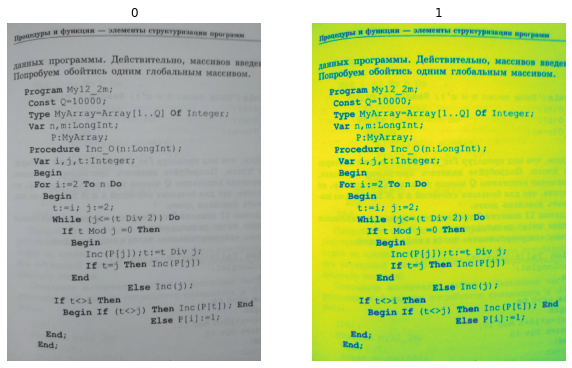

In [24]:
plot_images([image, image_gray], figsize=(10, 10))

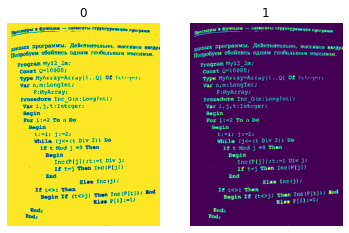

In [26]:
ret, thresh1 = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY_INV)

plot_images([thresh1, thresh2])

# Different lighting conditions

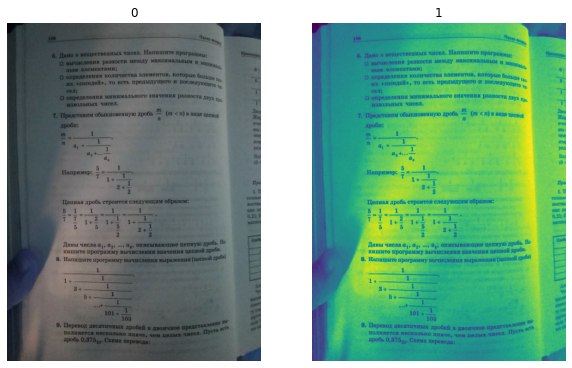

In [33]:
image = cv2.imread(path.join(DATA_PATH, "page2.jpg"))
image = cv2.resize(image, (384, 512))
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plot_images([image, image_gray], figsize=(10, 10))

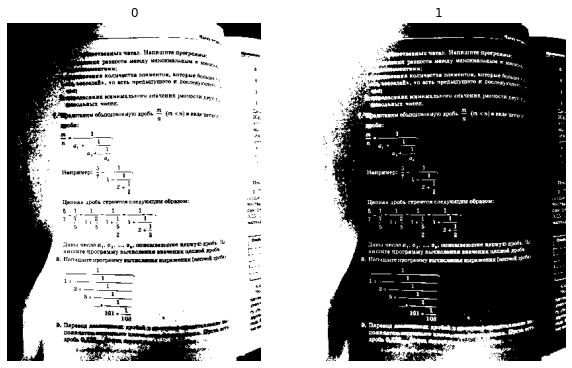

In [54]:
# Global threshold
ret, thresh1 = cv2.threshold(image_gray, 80, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(image_gray, 80, 255, cv2.THRESH_BINARY_INV)

plot_images([thresh1, thresh2], figsize=(10, 10),
            imshow_kwargs={"cmap": plt.cm.gray})

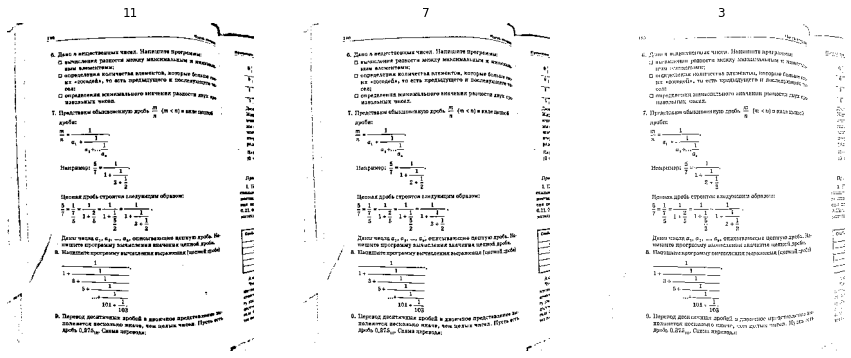

In [58]:
# Adaptive Mean
c_ = 10
thresh1 = cv2.adaptiveThreshold(image_gray, 255,
                                cv2.ADAPTIVE_THRESH_MEAN_C,
                                cv2.THRESH_BINARY, 11, c_)
thresh2 = cv2.adaptiveThreshold(image_gray, 255,
                                cv2.ADAPTIVE_THRESH_MEAN_C,
                                cv2.THRESH_BINARY, 7, c_)
thresh3 = cv2.adaptiveThreshold(image_gray, 255,
                                cv2.ADAPTIVE_THRESH_MEAN_C,
                                cv2.THRESH_BINARY, 3, c_)


plot_images([thresh1, thresh2, thresh3], names=["11", "7", "3"],
            figsize=(15, 10),
            imshow_kwargs={"cmap": plt.cm.gray})

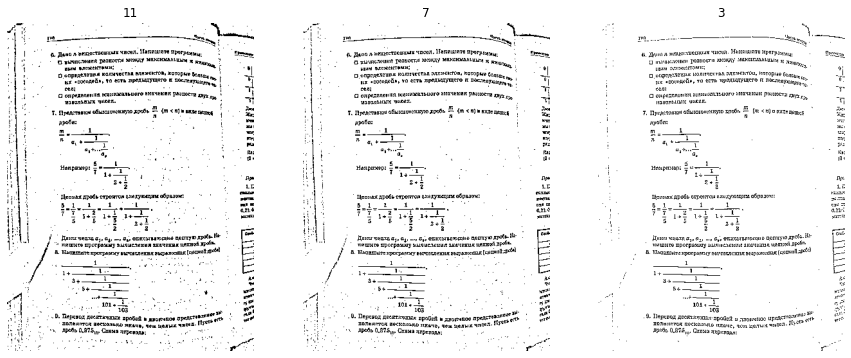

In [67]:
# Adaptive Gaussian
c_ = 5
thresh1 = cv2.adaptiveThreshold(image_gray, 255,
                                cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 11, c_)
thresh2 = cv2.adaptiveThreshold(image_gray, 255,
                                cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 7, c_)
thresh3 = cv2.adaptiveThreshold(image_gray, 255,
                                cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 3, c_)


plot_images([thresh1, thresh2, thresh3], names=["11", "7", "3"],
            figsize=(15, 10),
            imshow_kwargs={"cmap": plt.cm.gray})

89.0


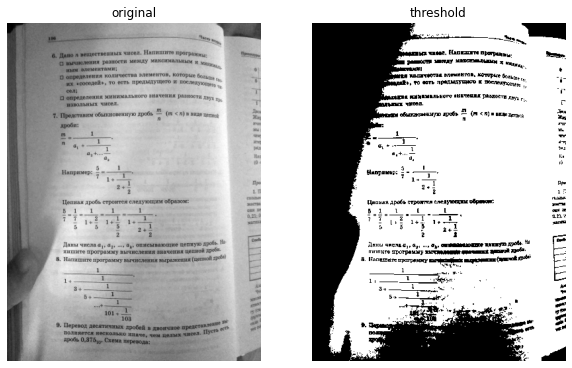

In [82]:
# Global threshold Otsu's
ret, thresh1 = cv2.threshold(image_gray, 0, 255,
                             cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret)
plot_images([image_gray, thresh1], names=["original", "threshold"],
            figsize=(10, 10),
            imshow_kwargs={"cmap": plt.cm.gray})

91.0


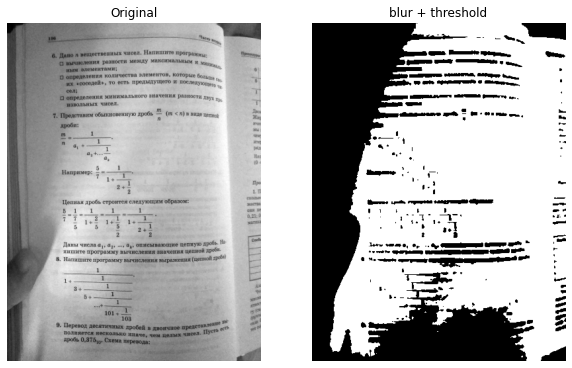

In [85]:
# Global threshold Otsu's + Gaussian blur
image_gray_blur = cv2.GaussianBlur(image_gray, (5, 5), 0)
ret, thresh1 = cv2.threshold(image_gray_blur, 0, 255,
                             cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret)
plot_images([image_gray, thresh1], names=["Original", "blur + threshold"],
            figsize=(10, 10),
            imshow_kwargs={"cmap": plt.cm.gray})